<a href="https://colab.research.google.com/github/Jarekgd/Computer-Specs-Software/blob/main/Final_data_science_assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from google.colab import files
# uploaded = files.upload()

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from importlib import reload
from scipy import stats
df = pd.read_csv('alzheimers_disease_data.csv')
print(df.head(3))

   PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0       4751   73       0          0               2  22.927749        0   
1       4752   89       0          0               0  26.827681        0   
2       4753   73       0          3               1  17.795882        0   

   AlcoholConsumption  PhysicalActivity  DietQuality  ...  MemoryComplaints  \
0           13.297218          6.327112     1.347214  ...                 0   
1            4.542524          7.619885     0.518767  ...                 0   
2           19.555085          7.844988     1.826335  ...                 0   

   BehavioralProblems       ADL  Confusion  Disorientation  \
0                   0  1.725883          0               0   
1                   0  2.592424          0               0   
2                   0  7.119548          0               1   

   PersonalityChanges  DifficultyCompletingTasks  Forgetfulness  Diagnosis  \
0                   0                          1   

In [ ]:
df.drop(["DoctorInCharge", "PatientID" ], axis=1, inplace=True, errors = 'ignore' )
print(df.head(3))


   Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0   73       0          0               2  22.927749        0   
1   89       0          0               0  26.827681        0   
2   73       0          3               1  17.795882        0   

   AlcoholConsumption  PhysicalActivity  DietQuality  SleepQuality  ...  \
0           13.297218          6.327112     1.347214      9.025679  ...   
1            4.542524          7.619885     0.518767      7.151293  ...   
2           19.555085          7.844988     1.826335      9.673574  ...   

   FunctionalAssessment  MemoryComplaints  BehavioralProblems       ADL  \
0              6.518877                 0                   0  1.725883   
1              7.118696                 0                   0  2.592424   
2              5.895077                 0                   0  7.119548   

   Confusion  Disorientation  PersonalityChanges  DifficultyCompletingTasks  \
0          0               0                   0          

In [ ]:
df.shape

(2149, 33)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        2149 non-null   int64  
 1   Gender                     2149 non-null   int64  
 2   Ethnicity                  2149 non-null   int64  
 3   EducationLevel             2149 non-null   int64  
 4   BMI                        2149 non-null   float64
 5   Smoking                    2149 non-null   int64  
 6   AlcoholConsumption         2149 non-null   float64
 7   PhysicalActivity           2149 non-null   float64
 8   DietQuality                2149 non-null   float64
 9   SleepQuality               2149 non-null   float64
 10  FamilyHistoryAlzheimers    2149 non-null   int64  
 11  CardiovascularDisease      2149 non-null   int64  
 12  Diabetes                   2149 non-null   int64  
 13  Depression                 2149 non-null   int64

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
# Identify columns with low variation (0 or 1 unique value)
low_variation_columns = [col for col in df.columns if df[col].nunique() <= 1]
print("Columns with low variation:", low_variation_columns)
# Drop low-variation columns
df_no_low_variation = df.drop(columns=low_variation_columns)
print("DataFrame after dropping low variation columns:")
print(df_no_low_variation.head())


Columns with low variation: []
DataFrame after dropping low variation columns:
   Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0   73       0          0               2  22.927749        0   
1   89       0          0               0  26.827681        0   
2   73       0          3               1  17.795882        0   
3   74       1          0               1  33.800817        1   
4   89       0          0               0  20.716974        0   

   AlcoholConsumption  PhysicalActivity  DietQuality  SleepQuality  ...  \
0           13.297218          6.327112     1.347214      9.025679  ...   
1            4.542524          7.619885     0.518767      7.151293  ...   
2           19.555085          7.844988     1.826335      9.673574  ...   
3           12.209266          8.428001     7.435604      8.392554  ...   
4           18.454356          6.310461     0.795498      5.597238  ...   

   FunctionalAssessment  MemoryComplaints  BehavioralProblems       ADL  \
0   

In [ ]:
discrete = [
    "Age", "BMI", "AlcoholConsumption", "PhysicalActivity", "DietQuality", "SleepQuality",
    "SystolicBP", "DiastolicBP", "CholesterolTotal", "CholesterolLDL",
    "CholesterolHDL", "CholesterolTriglycerides", "MMSE",
    "FunctionalAssessment", "ADL"
]
subset = df[discrete]
desc = subset.describe().T
desc

,count,mean,std,min,25%,50%,75%,max
Age,2149.0,74.908795,8.990221,60.000000,67.000000,75.000000,83.000000,90.000000
BMI,2149.0,27.655697,7.217438,15.008851,21.611408,27.823924,33.869778,39.992767
AlcoholConsumption,2149.0,10.039442,5.757910,0.002003,5.139810,9.934412,15.157931,19.989293
PhysicalActivity,2149.0,4.920202,2.857191,0.003616,2.570626,4.766424,7.427899,9.987429
DietQuality,2149.0,4.993138,2.909055,0.009385,2.458455,5.076087,7.558625,9.998346
SleepQuality,2149.0,7.051081,1.763573,4.002629,5.482997,7.115646,8.562521,9.999840
SystolicBP,2149.0,134.264774,25.949352,90.000000,112.000000,134.000000,157.000000,179.000000
DiastolicBP,2149.0,89.847836,17.592496,60.000000,74.000000,91.000000,105.000000,119.000000
CholesterolTotal,2149.0,225.197519,42.542233,150.093316,190.252963,225.086430,262.031657,299.993352
CholesterolLDL,2149.0,124.335944,43.366584,50.230707,87.195798,123.342593,161.733733,199.965665


In [ ]:
def desc_analysis(subset):
  summary=pd.DataFrame()
  summary['min']=subset.min()
  summary['max']=subset.max()
  summary['mean']=subset.mean()
  summary['median']=subset.median()
  summary['mode']=subset.mode().iloc[0]
  summary['std']=subset.std()
  summary['skew']=subset.skew()
  return summary

print(desc_analysis(subset))

                                 min         max        mean      median  \
Age                        60.000000   90.000000   74.908795   75.000000   
BMI                        15.008851   39.992767   27.655697   27.823924   
AlcoholConsumption          0.002003   19.989293   10.039442    9.934412   
PhysicalActivity            0.003616    9.987429    4.920202    4.766424   
DietQuality                 0.009385    9.998346    4.993138    5.076087   
SleepQuality                4.002629    9.999840    7.051081    7.115646   
SystolicBP                 90.000000  179.000000  134.264774  134.000000   
DiastolicBP                60.000000  119.000000   89.847836   91.000000   
CholesterolTotal          150.093316  299.993352  225.197519  225.086430   
CholesterolLDL             50.230707  199.965665  124.335944  123.342593   
CholesterolHDL             20.003434   99.980324   59.463533   59.768237   
CholesterolTriglycerides   50.407194  399.941862  228.281496  230.301983   
MMSE        

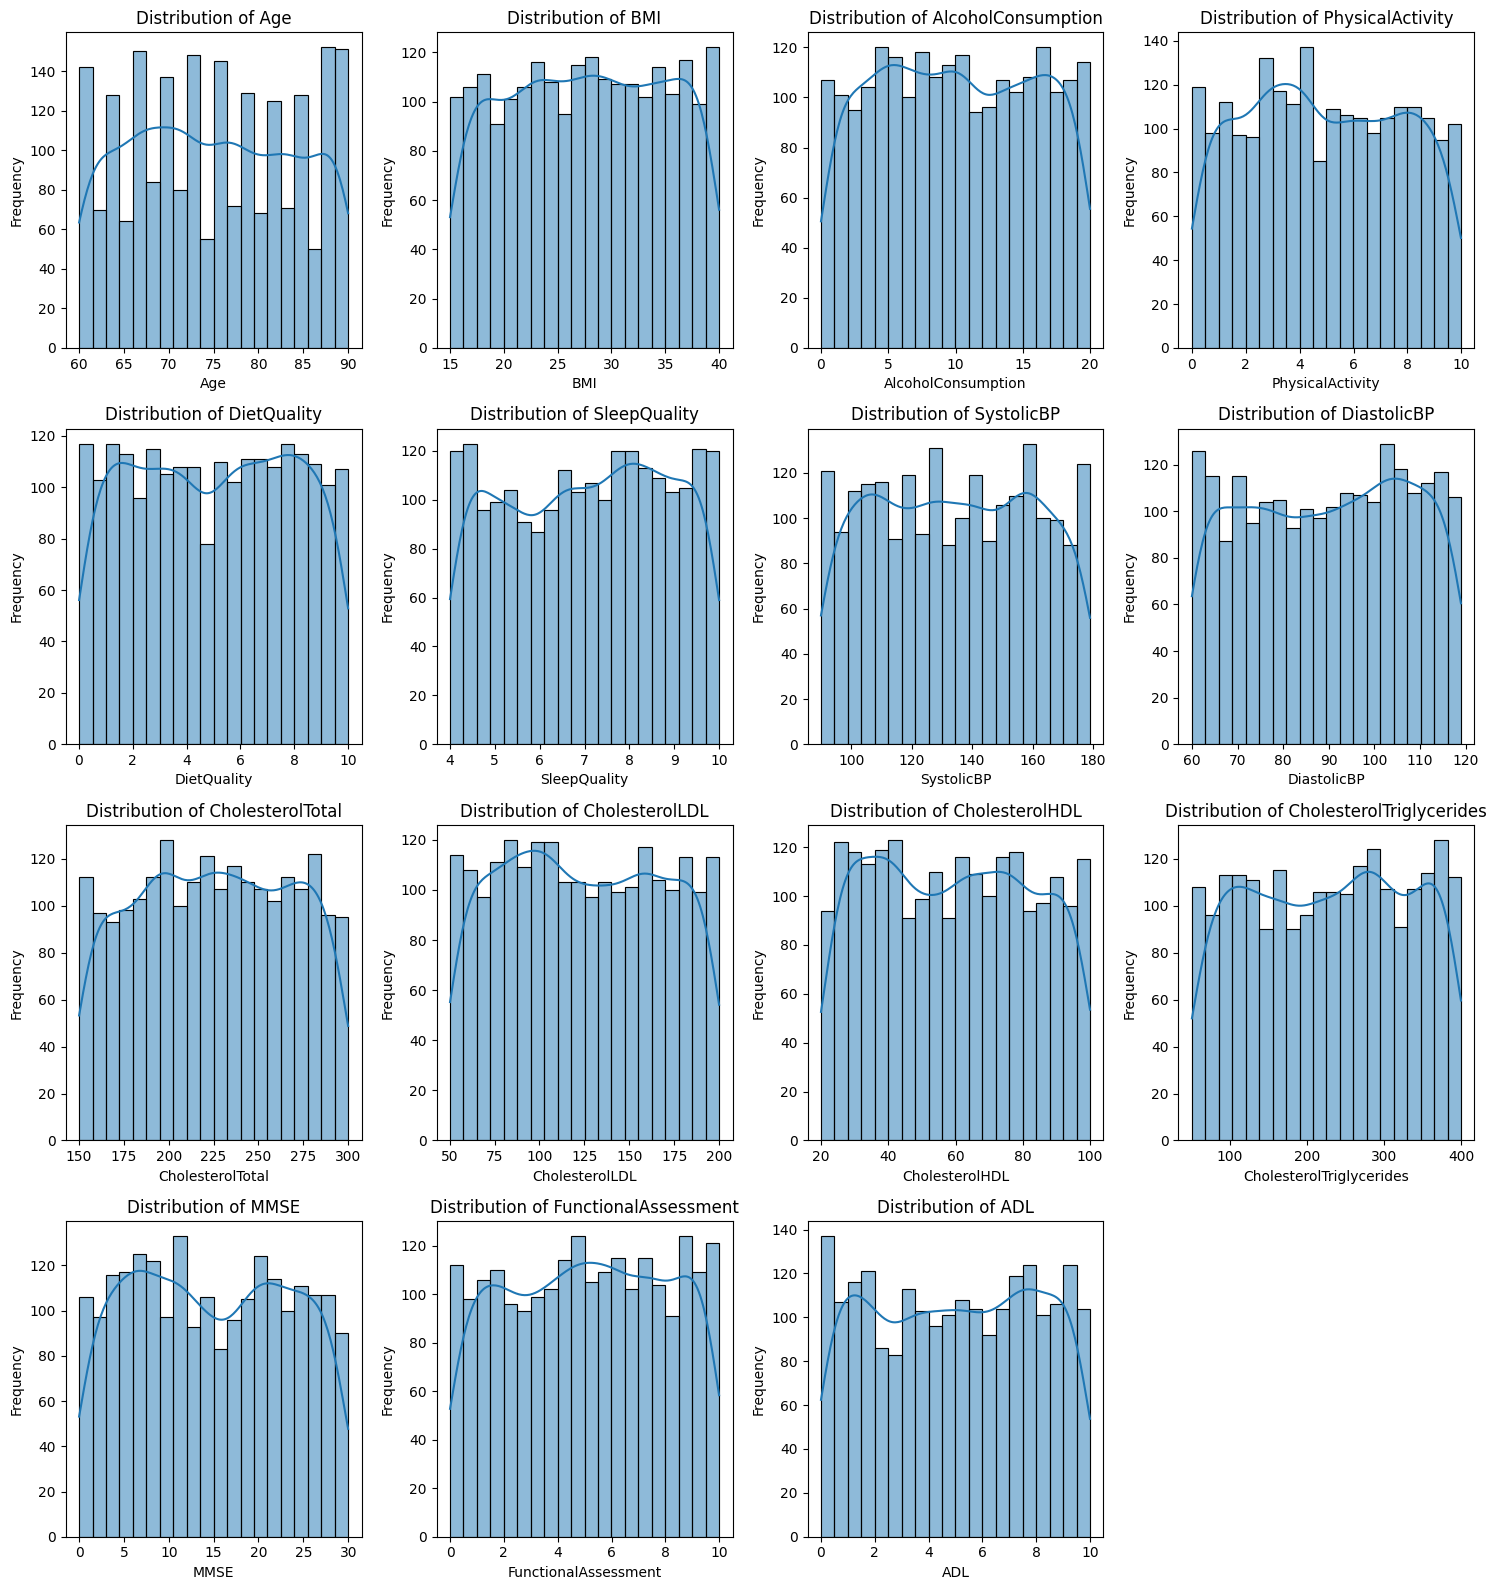

In [ ]:
# Histogram distribution
import math
# Grid configuration
cols = 4
rows = math.ceil(len(discrete) / cols)
# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 4 * rows))
axes = axes.flatten()
# Plot histograms
for i, col in enumerate(discrete):
    sns.histplot(df[col], bins=20, kde=True, ax=axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Distribution of {col}')
for j in range(len(discrete), len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

In [ ]:
qualitative = {
    'Gender': ['Male', 'Female'],
    'Ethnicity': ['Caucasian', 'African/American', 'Asian', 'Other'],
    'EducationLevel': ['None', 'High School', 'Bachelor\'s', 'Higher'],
    'Smoking': ['No', 'Yes'],
    'FamilyHistoryAlzheimers': ['No', 'Yes'],
    'CardiovascularDisease': ['No', 'Yes'],
    'Diabetes': ['No', 'Yes'],
    'Depression': ['No', 'Yes'],
    'HeadInjury': ['No', 'Yes'],
    'Hypertension': ['No', 'Yes'],
    'MemoryComplaints': ['No', 'Yes'],
    'BehavioralProblems': ['No', 'Yes'],
    'Confusion': ['No', 'Yes'],
    'Disorientation': ['No', 'Yes'],
    'PersonalityChanges': ['No', 'Yes'],
    'DifficultyCompletingTasks': ['No', 'Yes'],
    'Forgetfulness': ['No', 'Yes']}

In [ ]:
gender_map = {0: "Male", 1: "Female"}
ethnicity_map = {
    0: "Caucasian",
    1: "African American",
    2: "Asian",
    3: "Other"
}
education_map = {
    0: "None",
    1: "High School",
    2: "Bachelor's",
    3: "Higher"
}


Text(0.5, 1.0, 'Education Level Distribution')

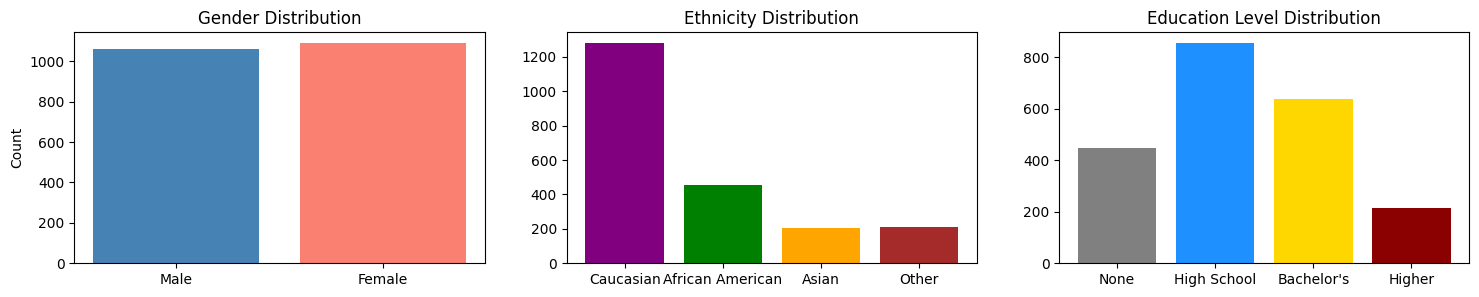

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 3))

# ---------- Gender ----------
gender_counts = df["Gender"].value_counts().sort_index()
axes[0].bar(
    [gender_map[i] for i in gender_counts.index],
    gender_counts.values,
    color=["steelblue", "salmon"]
)
axes[0].set_title("Gender Distribution")
axes[0].set_ylabel("Count")

# ---------- Ethnicity ----------
ethnicity_counts = df["Ethnicity"].value_counts().sort_index()
axes[1].bar(
    [ethnicity_map[i] for i in ethnicity_counts.index],
    ethnicity_counts.values,
    color=["purple", "green", "orange", "brown"]
)
axes[1].set_title("Ethnicity Distribution")

# ---------- Education Level ----------
education_counts = df["EducationLevel"].value_counts().sort_index()
axes[2].bar(
    [education_map[i] for i in education_counts.index],
    education_counts.values,
    color=["gray", "dodgerblue", "gold", "darkred"]
)
axes[2].set_title("Education Level Distribution")



In [ ]:
binary_vars = [
    "Smoking",
    "FamilyHistoryAlzheimers",
    "CardiovascularDisease",
    "Diabetes",
    "Depression",
    "HeadInjury",
    "Hypertension",
    "MemoryComplaints",
    "BehavioralProblems",
    "Confusion",
    "Disorientation",
    "PersonalityChanges",
    "DifficultyCompletingTasks",
    "Forgetfulness",
    "Diagnosis"
]

labels = ["No", "Yes"]
colors = ["lightcoral", "mediumseagreen"]

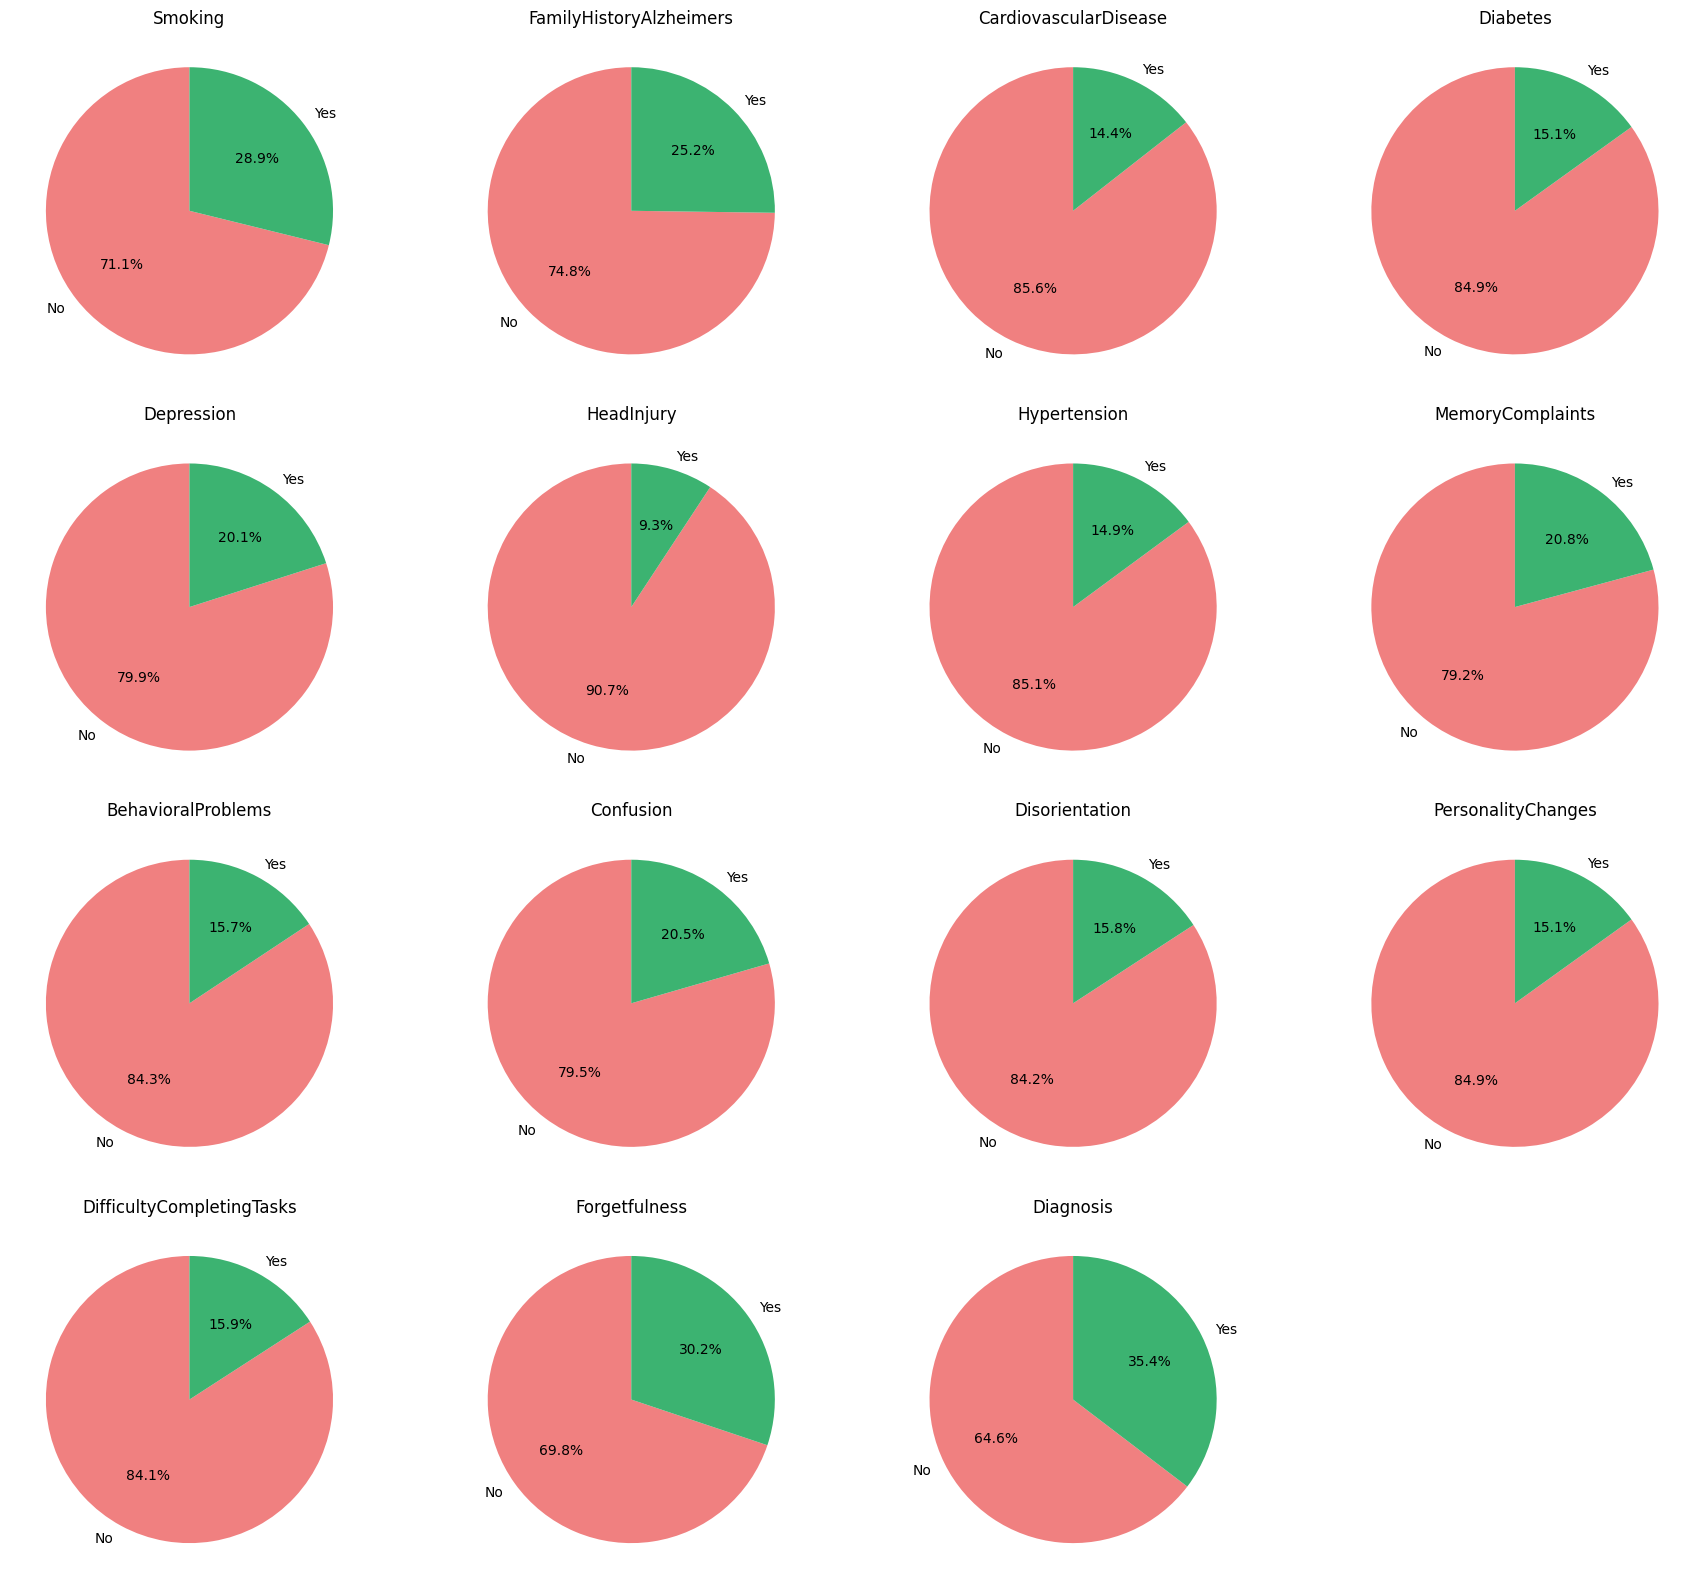

In [ ]:
cols = 4
rows = (len(binary_vars) + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(18, 4 * rows))
axes = axes.flatten()

for i, var in enumerate(binary_vars):
    counts = df[var].value_counts().sort_index()

    axes[i].pie(
        counts,
        labels=labels,
        autopct="%1.1f%%",
        startangle=90,
        colors=colors
    )
    axes[i].set_title(var)

# Remove empty subplots
for j in range(len(binary_vars), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

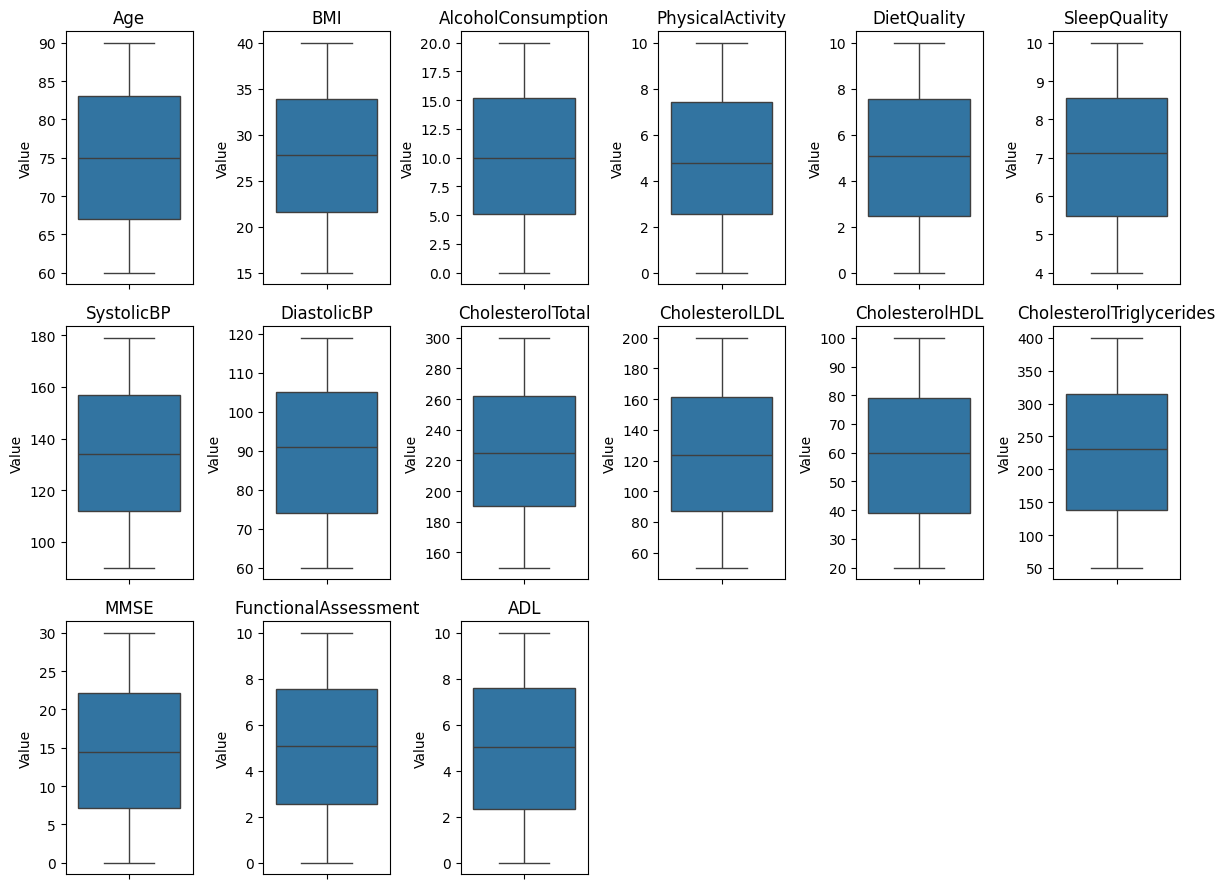

In [ ]:
cols = 6
rows = math.ceil(len(discrete) / cols)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(12, 3 * rows))
axes = axes.flatten()

for i, col in enumerate(discrete):
  sns.boxplot(y=df[col], ax=axes[i])
  axes[i].set_title(col)
  axes[i].set_xlabel("")
  axes[i].set_ylabel("Value")

for j in range(len(discrete), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

                                Age    Gender  Ethnicity  EducationLevel  \
Age                        1.000000  0.028708   0.027745       -0.060560   
Gender                     0.028708  1.000000  -0.003660       -0.007070   
Ethnicity                  0.027745 -0.003660   1.000000        0.026516   
EducationLevel            -0.060560 -0.007070   0.026516        1.000000   
BMI                       -0.015677  0.005928  -0.003176       -0.023514   
Smoking                    0.020060  0.016650   0.031485       -0.009904   
AlcoholConsumption         0.007323  0.004330   0.008363       -0.012646   
PhysicalActivity          -0.010249 -0.035795   0.020498       -0.016703   
DietQuality               -0.023386  0.010942  -0.018184        0.017412   
SleepQuality               0.049139  0.007310   0.029304        0.020248   
FamilyHistoryAlzheimers   -0.018784  0.018421   0.022526        0.032748   
CardiovascularDisease     -0.015284  0.034577   0.002347        0.007528   
Diabetes    

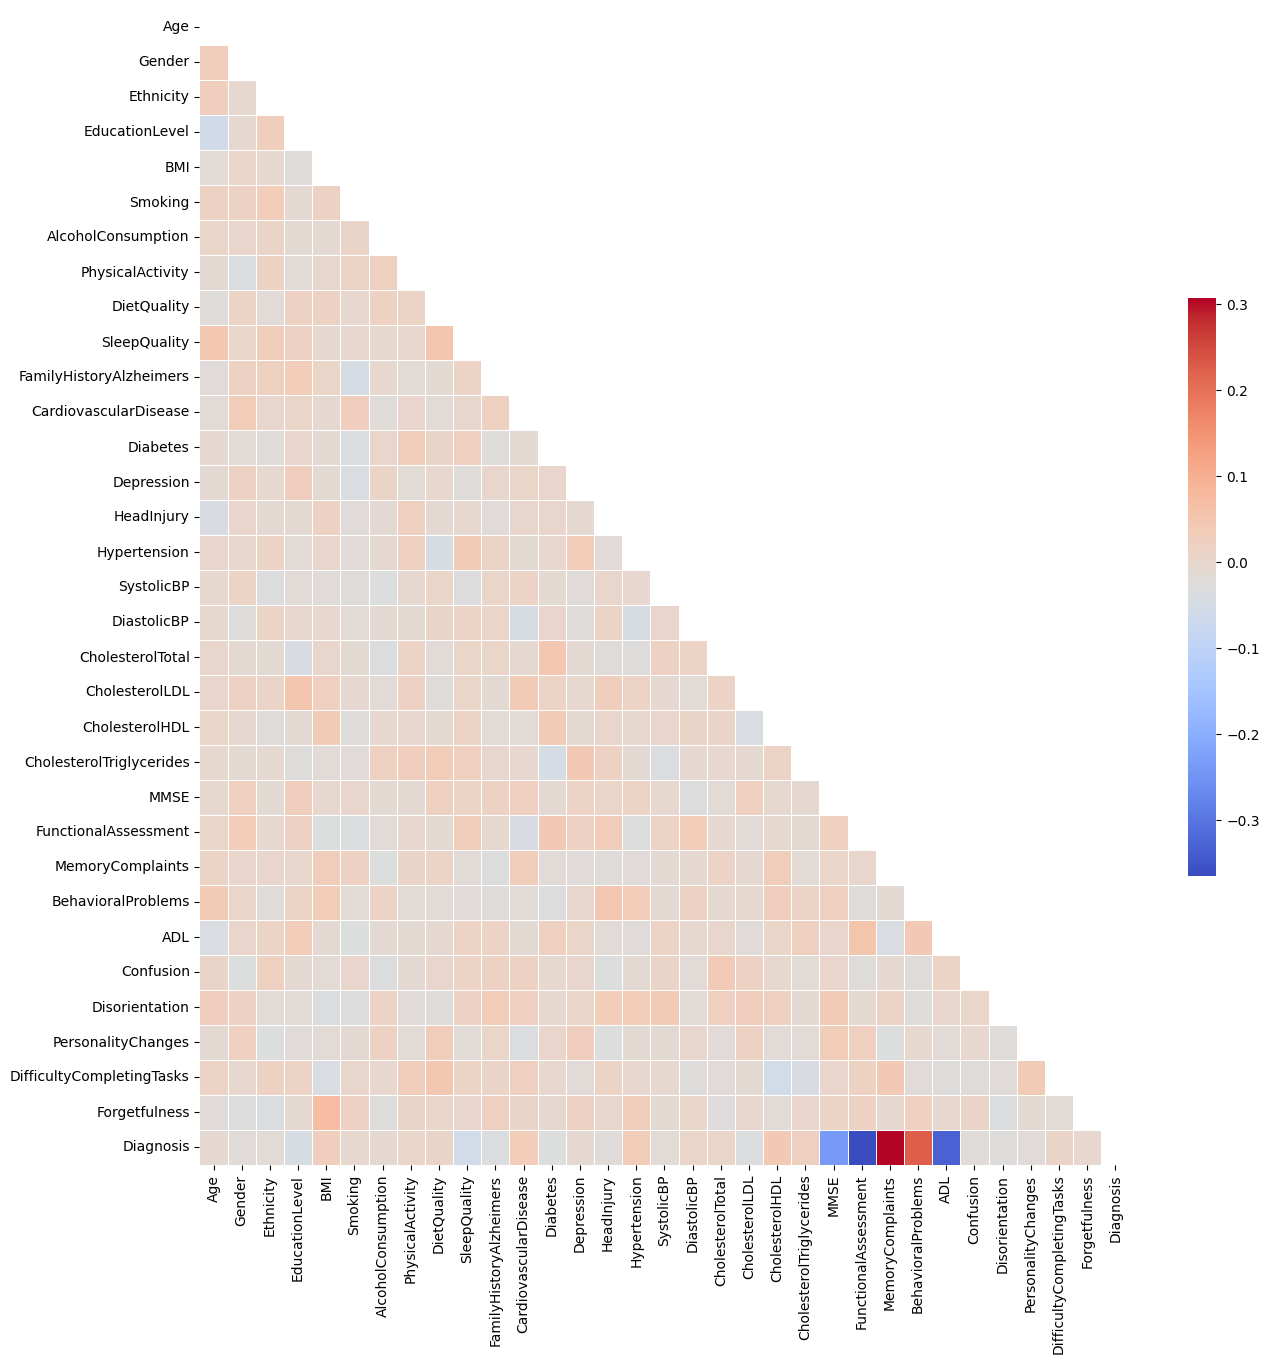

In [ ]:
#Correlation matrix
correlation_matrix = df.corr()
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
print(correlation_matrix)
plt.figure(figsize=(15,15))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5, cbar_kws={"shrink": .5}, mask=mask)
plt.title=('Correlation Heatmap')
plt.show()


# Model comparison

In [ ]:
#Feature selection
features = [
    "FunctionalAssessment",
    "ADL",
    "MMSE",
    "MemoryComplaints",
    "BehavioralProblems"
]

X = df[features]
y = df["Diagnosis"]

In [ ]:
#Train, Test split, scaling required for LR, SVM, KNN, NN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# Validation split ONLY from training (for Neural Networks)
X_train_nn, X_val_nn, y_train_nn, y_val_nn = train_test_split(
    X_train, y_train, test_size=0.20, random_state=42, stratify=y_train
)

# Scaling (needed for LR, SVM, KNN, NB, NN)
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc  = scaler.transform(X_test)

# NN scaling uses same scaler strategy (fit on NN-train only to avoid leakage)
scaler_nn = StandardScaler()
X_train_nn_sc = scaler_nn.fit_transform(X_train_nn)
X_val_nn_sc   = scaler_nn.transform(X_val_nn)
X_test_nn_sc  = scaler_nn.transform(X_test)

In [ ]:
#evaluation
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score
import time

def evaluate_model_baseline(name, model, Xtr, ytr, Xte, yte, use_proba=True):
    # Training time
    start_train = time.perf_counter()
    model.fit(Xtr, ytr)
    end_train = time.perf_counter()

    # Prediction
    start_pred = time.perf_counter()
    y_pred = model.predict(Xte)
    end_pred = time.perf_counter()

    # ROC-AUC
    if use_proba and hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(Xte)[:, 1]
        auc = roc_auc_score(yte, y_prob)
    else:
        auc = np.nan

    return {
        "Model": name,
        "Accuracy": accuracy_score(yte, y_pred),
        "Recall": recall_score(yte, y_pred),
        "F1 Score": f1_score(yte, y_pred),
        "ROC-AUC": auc,
        "Time (s)": end_train - start_train
    }


In [ ]:
#Models implementation
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

baseline_results = []

# Logistic Regression
baseline_results.append(
    evaluate_model_baseline(
        "Logistic Regression",
        LogisticRegression(class_weight="balanced", max_iter=2000, random_state=42),
        X_train_sc, y_train, X_test_sc, y_test
    )
)

# Random Forest
baseline_results.append(
    evaluate_model_baseline(
        "Random Forest",
        RandomForestClassifier(n_estimators=300, class_weight="balanced",
                               random_state=42, n_jobs=-1),
        X_train, y_train, X_test, y_test
    )
)

# Neural Network (MLP)
baseline_results.append(
    evaluate_model_baseline(
        "Neural Network (MLP)",
        MLPClassifier(hidden_layer_sizes=(32,16), max_iter=2000, random_state=42),
        X_train_sc, y_train, X_test_sc, y_test
    )
)

# XGBoost
baseline_results.append(
    evaluate_model_baseline(
        "XGBoost",
        XGBClassifier(
            n_estimators=200,
            max_depth=4,
            learning_rate=0.05,
            eval_metric="auc",
            random_state=42,
            n_jobs=-1
        ),
        X_train, y_train, X_test, y_test
    )
)

# SVM
baseline_results.append(
    evaluate_model_baseline(
        "SVM (RBF)",
        SVC(kernel="rbf", C=1.0, probability=True,
            class_weight="balanced", random_state=42),
        X_train_sc, y_train, X_test_sc, y_test
    )
)

# Decision Tree
baseline_results.append(
    evaluate_model_baseline(
        "Decision Tree",
        DecisionTreeClassifier(max_depth=5, class_weight="balanced", random_state=42),
        X_train, y_train, X_test, y_test
    )
)

# Naive Bayes
baseline_results.append(
    evaluate_model_baseline(
        "Naive Bayes",
        GaussianNB(),
        X_train_sc, y_train, X_test_sc, y_test
    )
)

# KNN
baseline_results.append(
    evaluate_model_baseline(
        "KNN",
        KNeighborsClassifier(n_neighbors=7),
        X_train_sc, y_train, X_test_sc, y_test
    )
)


In [ ]:
#comparison table
baseline_df = pd.DataFrame(baseline_results)

baseline_df = baseline_df[
    ["Model", "Accuracy", "Recall", "F1 Score", "ROC-AUC", "Time (s)"]
].sort_values(by="Accuracy", ascending=False)

baseline_df = baseline_df.round(4)
baseline_df

,Model,Accuracy,Recall,F1 Score,ROC-AUC,Time (s)
1,Random Forest,0.9488,0.9211,0.9272,0.9466,2.4459
3,XGBoost,0.9488,0.9211,0.9272,0.9483,0.1472
5,Decision Tree,0.9372,0.9145,0.9115,0.9409,0.0079
2,Neural Network (MLP),0.9186,0.8947,0.8860,0.9432,12.6731
7,KNN,0.9140,0.8750,0.8779,0.9335,0.0031
4,SVM (RBF),0.8953,0.9013,0.8589,0.9357,0.2379
0,Logistic Regression,0.8209,0.8487,0.7701,0.8882,0.0207
6,Naive Bayes,0.7651,0.6842,0.6731,0.8647,0.0012


## Tuning

In [ ]:
# Tuned models
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, recall_score, f1_score, roc_auc_score, confusion_matrix
)

def evaluate_tuned_model(name, model, Xte, yte, train_time, proba=True):
    # Predictions (LOCAL – no shared state)
    y_pred = model.predict(Xte)

    if proba and hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(Xte)[:, 1]
        auc = roc_auc_score(yte, y_prob)
    else:
        auc = np.nan

    # Confusion matrix-based recall (SAFE)
    tn, fp, fn, tp = confusion_matrix(yte, y_pred).ravel()
    recall = tp / (tp + fn)

    return {
        "Model": name,
        "Accuracy": accuracy_score(yte, y_pred),
        "Recall": recall,
        "F1 Score": f1_score(yte, y_pred),
        "ROC-AUC": auc,
        "Time (s)": train_time
    }



In [ ]:
# Tuned Random Forest
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rf = RandomForestClassifier(
    random_state=42,
    n_jobs=-1
)

param_grid_rf = {
    "n_estimators": [300, 500, 700],
    "max_depth": [None, 10, 20],
    "min_samples_leaf": [1, 2, 5],
    "max_features": ["sqrt", 0.5],
    "class_weight": ["balanced"]
}

rf_grid = GridSearchCV(
    rf,
    param_grid_rf,
    scoring="roc_auc",
    cv=cv,
    n_jobs=-1,
    verbose=1
)

t0 = time.perf_counter()
rf_grid.fit(X_train, y_train)
t1 = time.perf_counter()

best_rf = rf_grid.best_estimator_
print("Best RF parameters:", rf_grid.best_params_)

rf_row = evaluate_tuned_model(
    "Random Forest (tuned)",
    best_rf,
    X_test,
    y_test,
    train_time=(t1 - t0)
)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best RF parameters: {'class_weight': 'balanced', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'n_estimators': 500}


In [ ]:
# Tuned XGBoost
from xgboost import XGBClassifier

# Optional imbalance handling
neg = (y_train == 0).sum()
pos = (y_train == 1).sum()
scale_pos_weight = neg / pos

xgb = XGBClassifier(
    objective="binary:logistic",
    eval_metric="auc",
    random_state=42,
    n_jobs=-1,
    scale_pos_weight=scale_pos_weight
)

param_grid_xgb = {
    "n_estimators": [200, 400],
    "learning_rate": [0.03, 0.05],
    "max_depth": [3, 4],
    "subsample": [0.7, 0.8],
    "colsample_bytree": [0.7, 0.8],
    "gamma": [0, 0.1]
}

xgb_grid = GridSearchCV(
    xgb,
    param_grid_xgb,
    scoring="roc_auc",
    cv=cv,
    n_jobs=-1,
    verbose=1
)

t2 = time.perf_counter()
xgb_grid.fit(X_train, y_train)
t3 = time.perf_counter()

best_xgb = xgb_grid.best_estimator_
print("Best XGBoost parameters:", xgb_grid.best_params_)

xgb_row = evaluate_tuned_model(
    "XGBoost (tuned)",
    best_xgb,
    X_test,
    y_test,
    train_time=(t3 - t2)
)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best XGBoost parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.03, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}


In [ ]:

# Tune Deep Neural Network
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.preprocessing import StandardScaler

# Scale NN inputs using ONLY NN training set (avoid leakage)
scaler_nn = StandardScaler()
X_train_nn_sc = scaler_nn.fit_transform(X_train_nn)
X_val_nn_sc   = scaler_nn.transform(X_val_nn)
X_test_nn_sc  = scaler_nn.transform(X_test)

# Class weights for imbalance
neg_nn = (y_train_nn == 0).sum()
pos_nn = (y_train_nn == 1).sum()
class_weight = {
    0: len(y_train_nn) / (2.0 * neg_nn),
    1: len(y_train_nn) / (2.0 * pos_nn)
}

tf.keras.utils.set_random_seed(42)

nn = keras.Sequential([
    layers.Input(shape=(X_train_nn_sc.shape[1],)),

    layers.Dense(128),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Dropout(0.35),

    layers.Dense(64),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Dropout(0.30),

    layers.Dense(32, activation="relu"),
    layers.Dropout(0.20),

    layers.Dense(1, activation="sigmoid")
])

nn.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=[keras.metrics.AUC(name="roc_auc")]
)

early_stop = keras.callbacks.EarlyStopping(
    monitor="val_roc_auc",
    mode="max",
    patience=20,
    restore_best_weights=True
)

t4 = time.perf_counter()
history = nn.fit(
    X_train_nn_sc, y_train_nn,
    validation_data=(X_val_nn_sc, y_val_nn),
    epochs=300,
    batch_size=32,
    class_weight=class_weight,
    callbacks=[early_stop],
    verbose=1
)
t5 = time.perf_counter()

# NN evaluation (ROC-AUC from predicted probabilities)
t_pred0 = time.perf_counter()
nn_prob = nn.predict(X_test_nn_sc, verbose=0).ravel()
nn_pred = (nn_prob >= 0.5).astype(int)
t_pred1 = time.perf_counter()

nn_pred = (nn.predict(X_test_nn_sc).ravel() >= 0.5).astype(int)
nn_prob = nn.predict(X_test_nn_sc).ravel()

tn, fp, fn, tp = confusion_matrix(y_test, nn_pred).ravel()

nn_row = {
    "Model": "Deep NN (tuned)",
    "Accuracy": accuracy_score(y_test, nn_pred),
    "Recall": tp / (tp + fn),
    "F1 Score": f1_score(y_test, nn_pred),
    "ROC-AUC": roc_auc_score(y_test, nn_prob),
    "Time (s)": (t5 - t4)
}

Epoch 1/300
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.6369 - roc_auc: 0.7211 - val_loss: 0.5486 - val_roc_auc: 0.9027
Epoch 2/300
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4359 - roc_auc: 0.8905 - val_loss: 0.4632 - val_roc_auc: 0.9056
Epoch 3/300
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4133 - roc_auc: 0.8936 - val_loss: 0.4091 - val_roc_auc: 0.9111
Epoch 4/300
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3879 - roc_auc: 0.9100 - val_loss: 0.3833 - val_roc_auc: 0.9131
Epoch 5/300
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3842 - roc_auc: 0.9109 - val_loss: 0.3563 - val_roc_auc: 0.9181
Epoch 6/300
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3796 - roc_auc: 0.9141 - val_loss: 0.3433 - val_roc_auc: 0.9216
Epoch 7/300
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3583 - roc_auc: 0.9225 - val_loss: 0.3307 - val_roc_auc: 0.9214
Epoch 8/300
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3633 - roc_auc: 0.9199 - val_loss: 0.3228 - val_roc_auc: 0.9235

In [ ]:
# Tuned comparison table
tuned_df = pd.DataFrame([rf_row, xgb_row, nn_row])

tuned_df = tuned_df[
    ["Model", "Accuracy", "Recall", "F1 Score", "ROC-AUC", "Time (s)"]
].sort_values(by="ROC-AUC", ascending=False).round(4)

tuned_df

,Model,Accuracy,Recall,F1 Score,ROC-AUC,Time (s)
1,XGBoost (tuned),0.9488,0.9211,0.9272,0.9456,32.7744
0,Random Forest (tuned),0.9558,0.9276,0.9369,0.9447,405.2155
2,Deep NN (tuned),0.9302,0.9211,0.9032,0.9356,36.7073
